# Data Import

#### import libs

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
import sys
sys.path.insert(0, 'C:\\Users\\Frank\\Desktop\\MLwithPython\\model')
import nerfnet

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

#### list files

In [2]:
from os import listdir
from os.path import isfile, join

# create path to input
mypath = "../DataSets/Mercedes"

# get all files
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# remove readme
list(filter(lambda a: a != 'README', onlyfiles))

# create paths
testPath = mypath + "/test.csv"
trainPath = mypath + "/train.csv"

#### load data

In [3]:
train_df = pd.read_csv(trainPath)
test_df = pd.read_csv(testPath)

# Data Analysis

##### check out train csv

In [4]:
train_df.shape

(4209, 378)

In [5]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

#### check out the target value

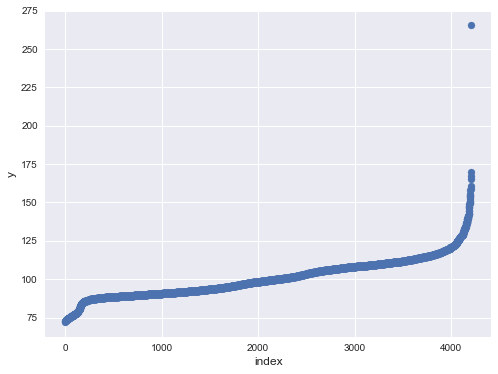

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

#### remove outliers (or maybe dont?!)

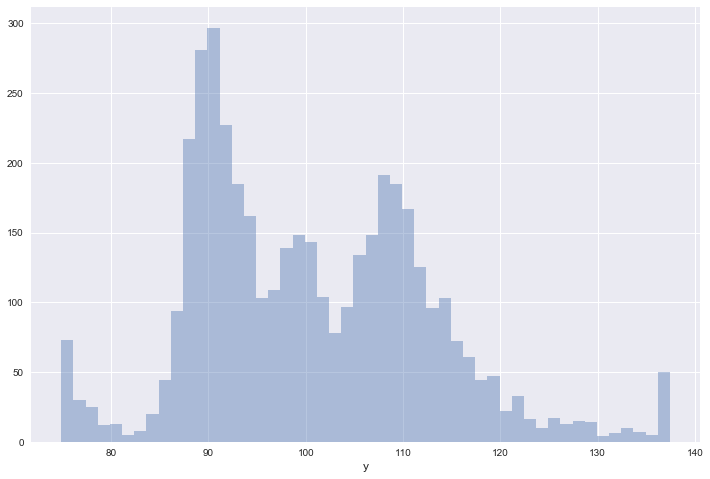

In [5]:
ulimit = np.percentile(train_df.y.values, 99)
llimit = np.percentile(train_df.y.values, 1)
train_df['y'].loc[train_df['y']>ulimit] = ulimit
train_df['y'].loc[train_df['y']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y', fontsize=12)
plt.show()

#### are there any NaNs?

In [7]:
nan_df = train_df.isnull().sum(axis=0).reset_index()
nan_df.columns = ['Feature', 'NaNs']
nan_df.loc[nan_df['NaNs']>0]

,Feature,NaNs


#### do all binary features have ones AND zeros?!

In [6]:
nonBinFeatures = ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]

drearyTrainFeatures = {}
drearyTrainFeatures[0] = []
drearyTrainFeatures[1] = []
# training set
for col in train_df.columns:
    if col not in nonBinFeatures:
        if train_df[col].unique().size < 2:
            if train_df[col].unique() == 0:
                drearyTrainFeatures[0].append(col)
            else:
                drearyTrainFeatures[1].append(col)

# print out features that only contain zeros
print('Features of the training set that only contain zeros :')
print(str(drearyTrainFeatures[0]) + '\n')
# print out features that only contain ones
print('Features of the training set that only contain ones :')
print(str(drearyTrainFeatures[1]) + '\n')
print('------------------------------------------------------\n')

drearyTestFeatures = {}
drearyTestFeatures[0] = []
drearyTestFeatures[1] = []
# training set
for col in test_df.columns:
    if col not in nonBinFeatures:
        if test_df[col].unique().size < 2:
            if test_df[col].unique() == 0:
                drearyTestFeatures[0].append(col)
            else:
                drearyTestFeatures[1].append(col)

# print out features that only contain zeros
print('Features of the test set that only contain zeros :')
print(str(drearyTestFeatures[0]) + '\n')
# print out features that only contain ones
print('Features of the test set that only contain ones :')
print(str(drearyTestFeatures[1]) + '\n')
print('------------------------------------------------------\n')

drearyMainFeatures = {}
drearyMainFeatures[0] = set(drearyTestFeatures[0]).intersection(drearyTrainFeatures[0])
drearyMainFeatures[1] = set(drearyTestFeatures[1]).intersection(drearyTrainFeatures[1])

# print out features that only contain zeros
print('Features of both sets that only contain zeros :')
print(str(drearyMainFeatures[0]) + '\n')
# print out features that only contain ones
print('Features of both sets that only contain ones :')
print(str(drearyMainFeatures[1]) + '\n')

Features of the training set that only contain zeros :
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

Features of the training set that only contain ones :
[]

------------------------------------------------------

Features of the test set that only contain zeros :
['X257', 'X258', 'X295', 'X296', 'X369']

Features of the test set that only contain ones :
[]

------------------------------------------------------

Features of both sets that only contain zeros :
set()

Features of both sets that only contain ones :
set()



# Data Preparation

### transform categorical data to dummy variables
#### take test data as well and stack them before getting the dummies out

In [7]:
# remember size of train_df
train_shape = train_df.shape
# concat train and test
main_df = pd.concat([train_df, test_df])
# get dummies
main_df = pd.get_dummies(main_df, drop_first=False)
# split the stuff again
train_df, test_df = main_df[:train_shape[0]], main_df[train_shape[0]:]

#### drop unimportant columns

In [8]:
train_df = train_df.drop('ID', axis=1)

##### also drop binary features that only contained zeros (or ones) in the training set, from the training.

In [9]:
train_df = train_df.drop(drearyTrainFeatures[0], axis=1)

#### define input variables

In [10]:
y = np.outer(train_df['y'], 1)
X = train_df.drop('y', axis=1)

# ML 

#### init neural net

In [37]:
# init weights
nerf = nerfnet.nerfnet(max_iter_=20000, factor_hidden_units_=3, beta_=0.0001, alpha_=0.0001, hidden_activation_type_='relu', output_activation_type_=None, cost_type_='mse')
nerf.init_weights(X, y)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

J_train = np.array([])
J_cv = np.array([])

#### get learning curves

In [11]:
J = nerf.learningCurve(X_train, y_train, X_test, y_test, 1000, 500)

13.20%
26.40%
39.60%
52.80%
66.00%
79.20%
92.40%
100.00%


In [35]:
J_train = J[0]
J_cv = J[1]

#### do the training

In [11]:
J = nerf.trainingLoop(X_train, y_train, X_test, y_test)

Epoch: 0/20000 | Tol: -1
Epoch: 1/20000
Epoch: 2/20000
Epoch: 3/20000
Epoch: 4/20000
Epoch: 5/20000 | Tol: -1
Epoch: 6/20000
Epoch: 7/20000
Epoch: 8/20000
Epoch: 9/20000
Epoch: 10/20000 | Tol: -1
Epoch: 11/20000
Epoch: 12/20000
Epoch: 13/20000
Epoch: 14/20000
Epoch: 15/20000 | Tol: 2185.71502005
Epoch: 16/20000
Epoch: 17/20000
Epoch: 18/20000
Epoch: 19/20000
Epoch: 20/20000 | Tol: 5207.10979463
Epoch: 21/20000
Epoch: 22/20000
Epoch: 23/20000
Epoch: 24/20000
Epoch: 25/20000 | Tol: 7503.61621676
Epoch: 26/20000
Epoch: 27/20000
Epoch: 28/20000
Epoch: 29/20000
Epoch: 30/20000 | Tol: 4078.94473938
Epoch: 31/20000
Epoch: 32/20000
Epoch: 33/20000
Epoch: 34/20000
Epoch: 35/20000 | Tol: 306.418278893
Epoch: 36/20000
Epoch: 37/20000
Epoch: 38/20000
Epoch: 39/20000
Epoch: 40/20000 | Tol: 16.9958708429
Epoch: 41/20000
Epoch: 42/20000
Epoch: 43/20000
Epoch: 44/20000
Epoch: 45/20000 | Tol: 14.4060426462
Epoch: 46/20000
Epoch: 47/20000
Epoch: 48/20000
Epoch: 49/20000
Epoch: 50/20000 | Tol: 13.6836922

Epoch: 393/20000
Epoch: 394/20000
Epoch: 395/20000 | Tol: 0.659162281739
Epoch: 396/20000
Epoch: 397/20000
Epoch: 398/20000
Epoch: 399/20000
Epoch: 400/20000 | Tol: 0.638139105369
Epoch: 401/20000
Epoch: 402/20000
Epoch: 403/20000
Epoch: 404/20000
Epoch: 405/20000 | Tol: 0.618110443152
Epoch: 406/20000
Epoch: 407/20000
Epoch: 408/20000
Epoch: 409/20000
Epoch: 410/20000 | Tol: 0.599042341978
Epoch: 411/20000
Epoch: 412/20000
Epoch: 413/20000
Epoch: 414/20000
Epoch: 415/20000 | Tol: 0.580871556154
Epoch: 416/20000
Epoch: 417/20000
Epoch: 418/20000
Epoch: 419/20000
Epoch: 420/20000 | Tol: 0.563503683009
Epoch: 421/20000
Epoch: 422/20000
Epoch: 423/20000
Epoch: 424/20000
Epoch: 425/20000 | Tol: 0.546953381915
Epoch: 426/20000
Epoch: 427/20000
Epoch: 428/20000
Epoch: 429/20000
Epoch: 430/20000 | Tol: 0.531187755633
Epoch: 431/20000
Epoch: 432/20000
Epoch: 433/20000
Epoch: 434/20000
Epoch: 435/20000 | Tol: 0.516102330663
Epoch: 436/20000
Epoch: 437/20000
Epoch: 438/20000
Epoch: 439/20000
Epo

Epoch: 776/20000
Epoch: 777/20000
Epoch: 778/20000
Epoch: 779/20000
Epoch: 780/20000 | Tol: 0.130801227122
Epoch: 781/20000
Epoch: 782/20000
Epoch: 783/20000
Epoch: 784/20000
Epoch: 785/20000 | Tol: 0.128811232834
Epoch: 786/20000
Epoch: 787/20000
Epoch: 788/20000
Epoch: 789/20000
Epoch: 790/20000 | Tol: 0.126860569193
Epoch: 791/20000
Epoch: 792/20000
Epoch: 793/20000
Epoch: 794/20000
Epoch: 795/20000 | Tol: 0.124943849534
Epoch: 796/20000
Epoch: 797/20000
Epoch: 798/20000
Epoch: 799/20000
Epoch: 800/20000 | Tol: 0.123057355573
Epoch: 801/20000
Epoch: 802/20000
Epoch: 803/20000
Epoch: 804/20000
Epoch: 805/20000 | Tol: 0.121211250497
Epoch: 806/20000
Epoch: 807/20000
Epoch: 808/20000
Epoch: 809/20000
Epoch: 810/20000 | Tol: 0.119429381142
Epoch: 811/20000
Epoch: 812/20000
Epoch: 813/20000
Epoch: 814/20000
Epoch: 815/20000 | Tol: 0.117695331078
Epoch: 816/20000
Epoch: 817/20000
Epoch: 818/20000
Epoch: 819/20000
Epoch: 820/20000 | Tol: 0.115972382614
Epoch: 821/20000
Epoch: 822/20000
Epo

Epoch: 1151/20000
Epoch: 1152/20000
Epoch: 1153/20000
Epoch: 1154/20000
Epoch: 1155/20000 | Tol: 0.0490306295568
Epoch: 1156/20000
Epoch: 1157/20000
Epoch: 1158/20000
Epoch: 1159/20000
Epoch: 1160/20000 | Tol: 0.0484871612012
Epoch: 1161/20000
Epoch: 1162/20000
Epoch: 1163/20000
Epoch: 1164/20000
Epoch: 1165/20000 | Tol: 0.0479314056224
Epoch: 1166/20000
Epoch: 1167/20000
Epoch: 1168/20000
Epoch: 1169/20000
Epoch: 1170/20000 | Tol: 0.047395151974
Epoch: 1171/20000
Epoch: 1172/20000
Epoch: 1173/20000
Epoch: 1174/20000
Epoch: 1175/20000 | Tol: 0.0468596635045
Epoch: 1176/20000
Epoch: 1177/20000
Epoch: 1178/20000
Epoch: 1179/20000
Epoch: 1180/20000 | Tol: 0.0463141930748
Epoch: 1181/20000
Epoch: 1182/20000
Epoch: 1183/20000
Epoch: 1184/20000
Epoch: 1185/20000 | Tol: 0.0457839988678
Epoch: 1186/20000
Epoch: 1187/20000
Epoch: 1188/20000
Epoch: 1189/20000
Epoch: 1190/20000 | Tol: 0.0452658989085
Epoch: 1191/20000
Epoch: 1192/20000
Epoch: 1193/20000
Epoch: 1194/20000
Epoch: 1195/20000 | Tol: 

Epoch: 1515/20000 | Tol: 0.022982571107
Epoch: 1516/20000
Epoch: 1517/20000
Epoch: 1518/20000
Epoch: 1519/20000
Epoch: 1520/20000 | Tol: 0.0227550524403
Epoch: 1521/20000
Epoch: 1522/20000
Epoch: 1523/20000
Epoch: 1524/20000
Epoch: 1525/20000 | Tol: 0.0225147414667
Epoch: 1526/20000
Epoch: 1527/20000
Epoch: 1528/20000
Epoch: 1529/20000
Epoch: 1530/20000 | Tol: 0.0222779320003
Epoch: 1531/20000
Epoch: 1532/20000
Epoch: 1533/20000
Epoch: 1534/20000
Epoch: 1535/20000 | Tol: 0.022074608922
Epoch: 1536/20000
Epoch: 1537/20000
Epoch: 1538/20000
Epoch: 1539/20000
Epoch: 1540/20000 | Tol: 0.0218782121354
Epoch: 1541/20000
Epoch: 1542/20000
Epoch: 1543/20000
Epoch: 1544/20000
Epoch: 1545/20000 | Tol: 0.0216851941983
Epoch: 1546/20000
Epoch: 1547/20000
Epoch: 1548/20000
Epoch: 1549/20000
Epoch: 1550/20000 | Tol: 0.0215010807211
Epoch: 1551/20000
Epoch: 1552/20000
Epoch: 1553/20000
Epoch: 1554/20000
Epoch: 1555/20000 | Tol: 0.0213248534807
Epoch: 1556/20000
Epoch: 1557/20000
Epoch: 1558/20000
Epo

Epoch: 1878/20000
Epoch: 1879/20000
Epoch: 1880/20000 | Tol: 0.011317129229
Epoch: 1881/20000
Epoch: 1882/20000
Epoch: 1883/20000
Epoch: 1884/20000
Epoch: 1885/20000 | Tol: 0.0112246321718
Epoch: 1886/20000
Epoch: 1887/20000
Epoch: 1888/20000
Epoch: 1889/20000
Epoch: 1890/20000 | Tol: 0.0111139973352
Epoch: 1891/20000
Epoch: 1892/20000
Epoch: 1893/20000
Epoch: 1894/20000
Epoch: 1895/20000 | Tol: 0.0109909654137
Epoch: 1896/20000
Epoch: 1897/20000
Epoch: 1898/20000
Epoch: 1899/20000
Epoch: 1900/20000 | Tol: 0.0108773144104
Epoch: 1901/20000
Epoch: 1902/20000
Epoch: 1903/20000
Epoch: 1904/20000
Epoch: 1905/20000 | Tol: 0.0107738848684
Epoch: 1906/20000
Epoch: 1907/20000
Epoch: 1908/20000
Epoch: 1909/20000
Epoch: 1910/20000 | Tol: 0.0106772545933
Epoch: 1911/20000
Epoch: 1912/20000
Epoch: 1913/20000
Epoch: 1914/20000
Epoch: 1915/20000 | Tol: 0.0105827623132
Epoch: 1916/20000
Epoch: 1917/20000
Epoch: 1918/20000
Epoch: 1919/20000
Epoch: 1920/20000 | Tol: 0.0104635485281
Epoch: 1921/20000
Ep

Epoch: 2239/20000
Epoch: 2240/20000 | Tol: 0.00540624788059
Epoch: 2241/20000
Epoch: 2242/20000
Epoch: 2243/20000
Epoch: 2244/20000
Epoch: 2245/20000 | Tol: 0.00532558689832
Epoch: 2246/20000
Epoch: 2247/20000
Epoch: 2248/20000
Epoch: 2249/20000
Epoch: 2250/20000 | Tol: 0.00527951685059
Epoch: 2251/20000
Epoch: 2252/20000
Epoch: 2253/20000
Epoch: 2254/20000
Epoch: 2255/20000 | Tol: 0.00525291822137
Epoch: 2256/20000
Epoch: 2257/20000
Epoch: 2258/20000
Epoch: 2259/20000
Epoch: 2260/20000 | Tol: 0.00522121673072
Epoch: 2261/20000
Epoch: 2262/20000
Epoch: 2263/20000
Epoch: 2264/20000
Epoch: 2265/20000 | Tol: 0.00516276978218
Epoch: 2266/20000
Epoch: 2267/20000
Epoch: 2268/20000
Epoch: 2269/20000
Epoch: 2270/20000 | Tol: 0.00511773564752
Epoch: 2271/20000
Epoch: 2272/20000
Epoch: 2273/20000
Epoch: 2274/20000
Epoch: 2275/20000 | Tol: 0.00506555209706
Epoch: 2276/20000
Epoch: 2277/20000
Epoch: 2278/20000
Epoch: 2279/20000
Epoch: 2280/20000 | Tol: 0.00499350613474
Epoch: 2281/20000
Epoch: 228

Epoch: 2599/20000
Epoch: 2600/20000 | Tol: 0.00201623866842
Epoch: 2601/20000
Epoch: 2602/20000
Epoch: 2603/20000
Epoch: 2604/20000
Epoch: 2605/20000 | Tol: 0.0019891917314
Epoch: 2606/20000
Epoch: 2607/20000
Epoch: 2608/20000
Epoch: 2609/20000
Epoch: 2610/20000 | Tol: 0.00195817555912
Epoch: 2611/20000
Epoch: 2612/20000
Epoch: 2613/20000
Epoch: 2614/20000
Epoch: 2615/20000 | Tol: 0.00192257557436
Epoch: 2616/20000
Epoch: 2617/20000
Epoch: 2618/20000
Epoch: 2619/20000
Epoch: 2620/20000 | Tol: 0.00188253820419
Epoch: 2621/20000
Epoch: 2622/20000
Epoch: 2623/20000
Epoch: 2624/20000
Epoch: 2625/20000 | Tol: 0.00185700039857
Epoch: 2626/20000
Epoch: 2627/20000
Epoch: 2628/20000
Epoch: 2629/20000
Epoch: 2630/20000 | Tol: 0.00182483714876
Epoch: 2631/20000
Epoch: 2632/20000
Epoch: 2633/20000
Epoch: 2634/20000
Epoch: 2635/20000 | Tol: 0.00177194006209
Epoch: 2636/20000
Epoch: 2637/20000
Epoch: 2638/20000
Epoch: 2639/20000
Epoch: 2640/20000 | Tol: 0.00173373328982
Epoch: 2641/20000
Epoch: 2642

Epoch: 2957/20000
Epoch: 2958/20000
Epoch: 2959/20000
Epoch: 2960/20000 | Tol: 0.00015710837777
Epoch: 2961/20000
Epoch: 2962/20000
Epoch: 2963/20000
Epoch: 2964/20000
Epoch: 2965/20000 | Tol: 0.0001549432899
Epoch: 2966/20000
Epoch: 2967/20000
Epoch: 2968/20000
Epoch: 2969/20000
Epoch: 2970/20000 | Tol: 0.000159797079853
Epoch: 2971/20000
Epoch: 2972/20000
Epoch: 2973/20000
Epoch: 2974/20000
Epoch: 2975/20000 | Tol: 0.000161016263412
Epoch: 2976/20000
Epoch: 2977/20000
Epoch: 2978/20000
Epoch: 2979/20000
Epoch: 2980/20000 | Tol: 0.000153413533212
Epoch: 2981/20000
Epoch: 2982/20000
Epoch: 2983/20000
Epoch: 2984/20000
Epoch: 2985/20000 | Tol: 0.000137001530192
Epoch: 2986/20000
Epoch: 2987/20000
Epoch: 2988/20000
Epoch: 2989/20000
Epoch: 2990/20000 | Tol: 0.000120364307222
Epoch: 2991/20000
Epoch: 2992/20000
Epoch: 2993/20000
Epoch: 2994/20000
Epoch: 2995/20000 | Tol: 0.00010679232868


#### do k fold

In [ ]:
# setup kfold
kf = KFold(n_splits=5, random_state=13)
kf.get_n_splits(X)

# dict to store NNs
nerfs = {}
t = 0

# do the split!
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # setup neural network
    nerfs[t] = nerfnet.nerfnet(max_iter_=20000, factor_hidden_units_=3, number_hidden_layers_=3, beta_=0.0001, alpha_=0.0001, hidden_activation_type_='relu', output_activation_type_=None, cost_type_='mse')
    nerfs[t].init_weights(X, y)
    
    # train the network on the split
    nerfs[t].trainingLoop(X_train, y_train, X_test, y_test)
    t += 1

Epoch: 0/20000 | Tol: -1
Epoch: 1/20000
Epoch: 2/20000
Epoch: 3/20000
Epoch: 4/20000
Epoch: 5/20000 | Tol: -1
Epoch: 6/20000
Epoch: 7/20000
Epoch: 8/20000
Epoch: 9/20000
Epoch: 10/20000 | Tol: -1
Epoch: 11/20000
Epoch: 12/20000
Epoch: 13/20000
Epoch: 14/20000
Epoch: 15/20000 | Tol: 3749.71405778
Epoch: 16/20000
Epoch: 17/20000
Epoch: 18/20000
Epoch: 19/20000
Epoch: 20/20000 | Tol: 9228.46374265
Epoch: 21/20000
Epoch: 22/20000
Epoch: 23/20000
Epoch: 24/20000
Epoch: 25/20000 | Tol: 6267.1190699
Epoch: 26/20000
Epoch: 27/20000
Epoch: 28/20000
Epoch: 29/20000
Epoch: 30/20000 | Tol: 30.0093861308
Epoch: 31/20000
Epoch: 32/20000
Epoch: 33/20000
Epoch: 34/20000
Epoch: 35/20000 | Tol: 22.3366946149
Epoch: 36/20000
Epoch: 37/20000
Epoch: 38/20000
Epoch: 39/20000
Epoch: 40/20000 | Tol: 20.5573223927
Epoch: 41/20000
Epoch: 42/20000
Epoch: 43/20000
Epoch: 44/20000
Epoch: 45/20000 | Tol: 18.9465249814
Epoch: 46/20000
Epoch: 47/20000
Epoch: 48/20000
Epoch: 49/20000
Epoch: 50/20000 | Tol: 17.47722372

#### create plot

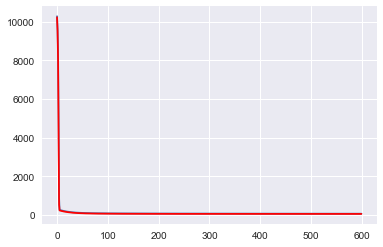

In [36]:
x = np.linspace(0, len(J_train)-1, len(J_train))
fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, J_train) # Returns a tuple of line objects, thus the comma
line2, = ax.plot(x, J_cv, 'r-')

### prepare the test data

#### drop cols 

In [16]:
test_id = test_df.loc[:, ['ID']]
test_df = test_df.drop(['y', 'ID'], axis=1)
test_df = test_df.drop(drearyTrainFeatures[0], axis=1)

In [17]:
y_pred = nerf.predict(test_df)

#### merge stuff and pack everything into output.

In [18]:
y_pred = pd.Series(np.squeeze(y_pred))
result = pd.concat([test_id, y_pred], axis=1, ignore_index=True)
result.columns = ['ID', 'y']

In [19]:
result

,ID,y
0,1,69.121577
1,2,88.744282
2,3,73.229604
3,4,80.611937
4,5,110.684478
5,8,91.593031
6,10,109.622855
7,11,93.711527
8,12,116.742069
9,14,93.549216


#### store result as csv

In [20]:
result.to_csv('results3.csv', index=False)